# Exploratory Data Analysis & Intro
## Goal
1. Investigate top-paying roles and skills in the data science industry.\n
2. Use Python to explore a real-live dataset on job postings.\n
3. For job-seekers: use these insights to help find the best job opportunities.

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


c:\Users\91735\Anaconda3\envs\python_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

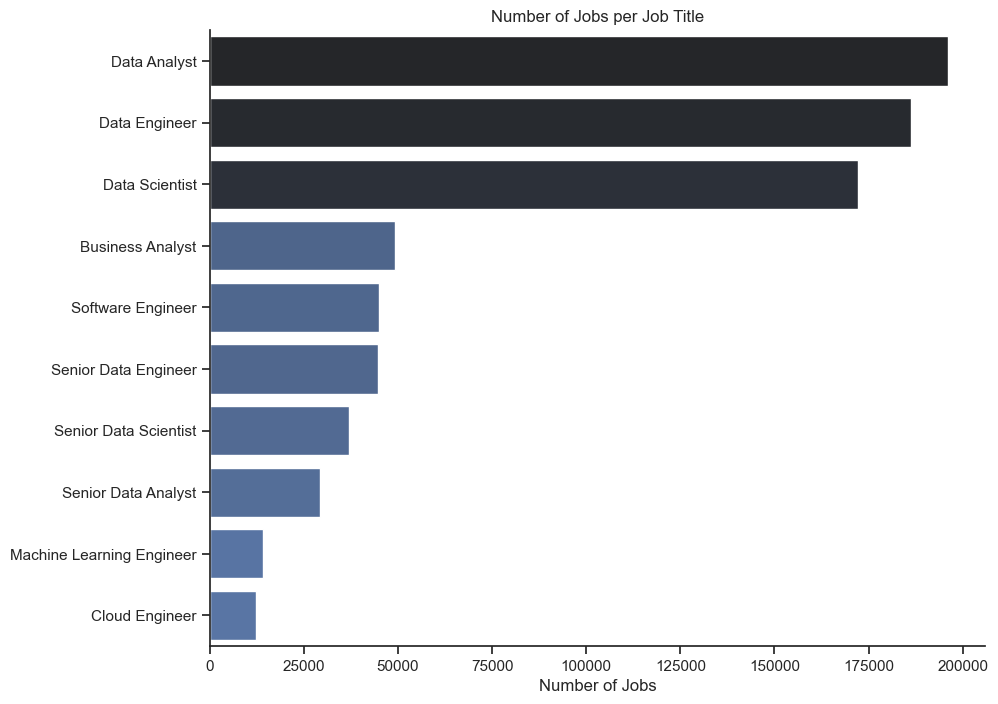

In [3]:
df_job_counts=df['job_title_short'].value_counts().reset_index()
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.barplot(data=df_job_counts,x='count',y='job_title_short',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Countries to Explore

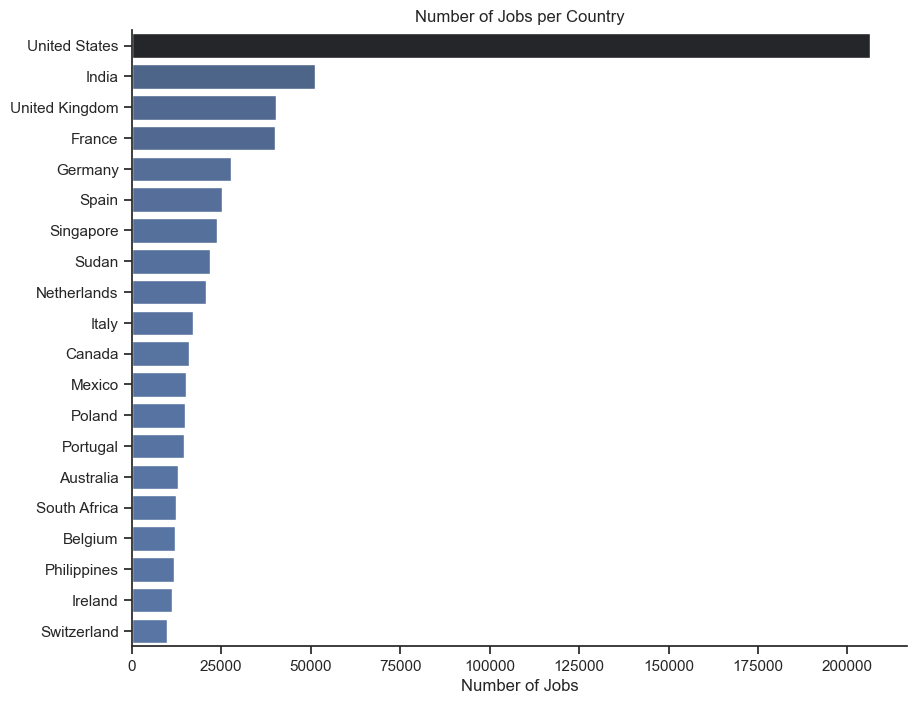

In [4]:
df_job_countries=df['job_country'].value_counts().reset_index().head(20)
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.barplot(data=df_job_countries,x='count',y='job_country',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


## Top Companies

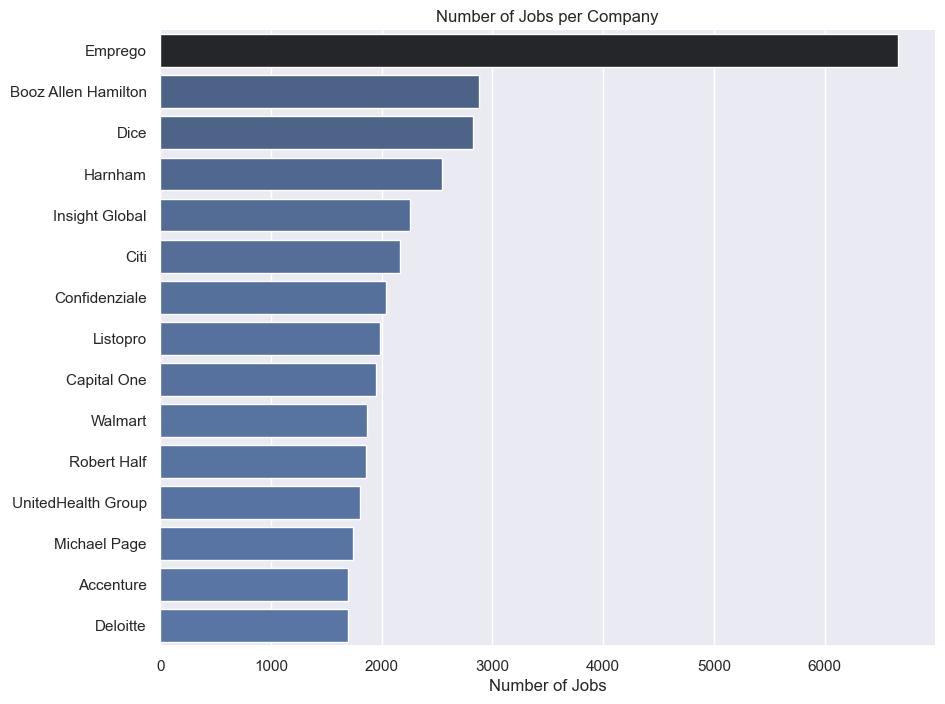

In [5]:
df_top_companies=df['company_name'].value_counts().reset_index().head(15)
plt.figure(figsize=(10,8))
sns.set_theme()
sns.barplot(data=df_top_companies,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## EDA for Data Analysis Jobs in India

In [6]:
df_da_india=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()

## Loacations To Explore

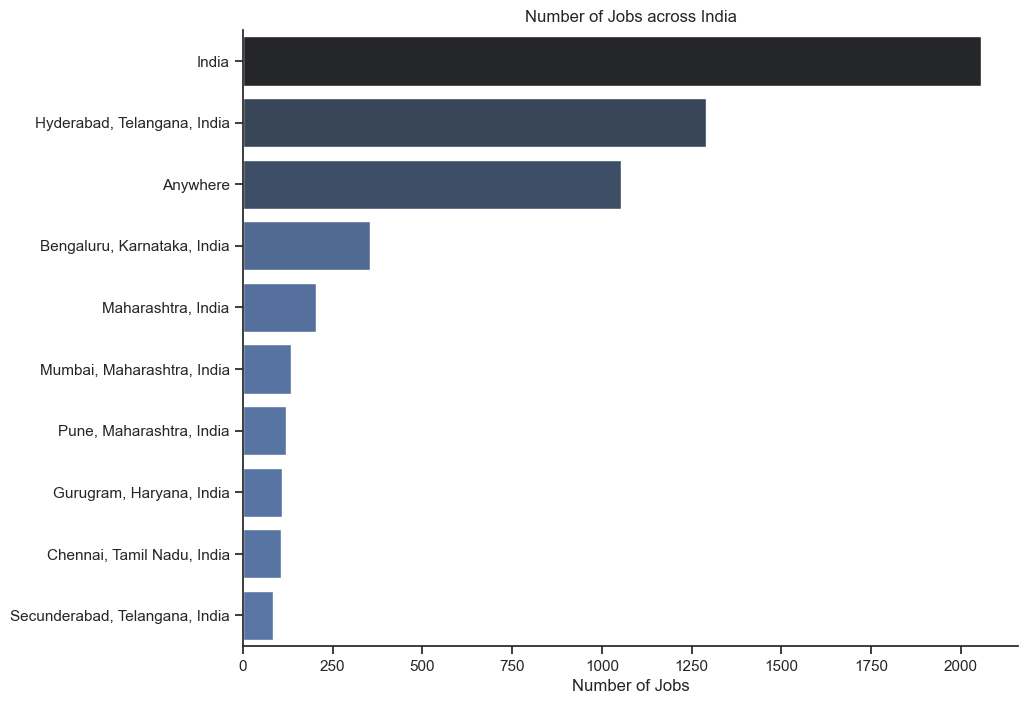

In [7]:
df_top_locations=df_da_india['job_location'].value_counts().to_frame().head(10)
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.barplot(data=df_top_locations,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Number of Jobs across India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Job Benifits Analysis for India

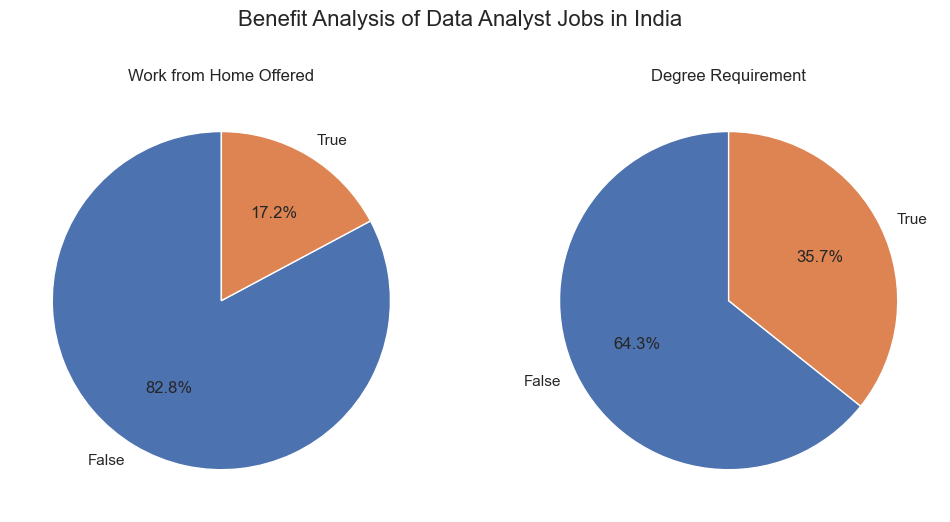

In [8]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 6))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_india[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Analyst Jobs in India', fontsize=16)
plt.show()

## Companies in India offering max no. of Data Analyst Jobs

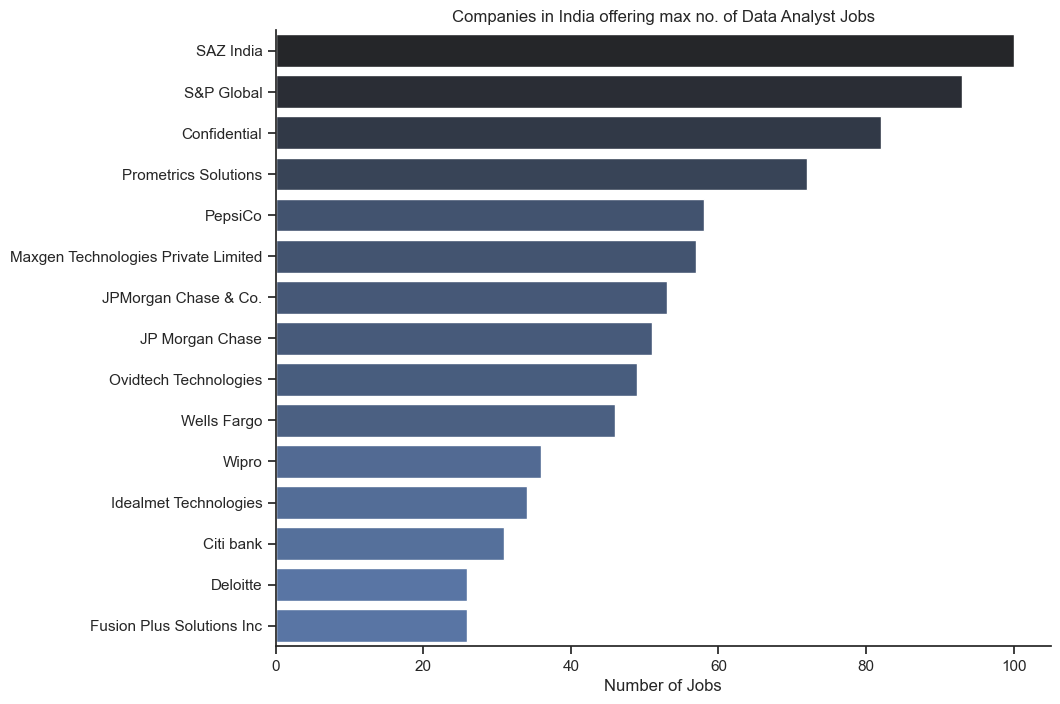

In [9]:
df_da_top_companies=df_da_india['company_name'].value_counts().to_frame().head(15)
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.barplot(data=df_da_top_companies,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Companies in India offering max no. of Data Analyst Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()